In [1]:
# Import librararies and dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

from neuralprophet import NeuralProphet, set_log_level, set_random_seed

from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.


In [ ]:
# Reproducibility
set_random_seed(42)

# Disable logging messages unless there is an error
set_log_level("ERROR")

# Disable max columns
pd.set_option('display.max_columns', None)

# Auto call plots
%matplotlib inline

plt.style.use('ggplot')
plt.style.use('fivethirtyeight')

In [5]:
# Save folder path

path = r"C:\Users\keanu\OneDrive\Desktop\climatewins-ml"

In [6]:
# Read weather csv data

w = pd.read_csv(os.path.join(path, '02 Data Sets', 'Unsupervised', 'weather-data-cleaned-date.csv'))
w.head()

BASEL_cloud_cover  BASEL_global_radiation  BASEL_humidity  \
0                  7                    0.32            0.85   
1                  6                    0.36            0.84   
2                  8                    0.18            0.90   
3                  3                    0.58            0.92   
4                  6                    0.65            0.95   

   BASEL_precipitation  BASEL_pressure  BASEL_sunshine  BASEL_temp_max  \
0                 0.09           1.018             0.7            10.9   
1                 1.05           1.018             1.1            10.1   
2                 0.30           1.018             0.0             9.9   
3                 0.00           1.018             4.1            10.6   
4                 0.14           1.018             5.4             6.0   

   BASEL_temp_mean  BASEL_temp_min  BELGRADE_cloud_cover  \
0              6.5             0.8                     1   
1              6.1             3.3                     6   
2              8.5             5.1                     6   
3              6.3             3.8                     8   
4              3.0            -0.7                     8   

   BELGRADE_global_radiation  BELGRADE_humidity  BELGRADE_precipitation  \
0                       0.88               0.81                    0.00   
1                       0.25               0.84                    0.00   
2                       0.67               0.77                    0.00   
3                       0.25               0.93                    0.00   
4                       0.25               0.99                    0.06   

   BELGRADE_pressure  BELGRADE_sunshine  BELGRADE_temp_max  \
0             1.0195                7.0                7.9   
1             1.0172                0.0                4.4   
2             1.0179                3.5                6.4   
3             1.0268                0.0                3.0   
4             1.0286                0.0                2.8   

   BELGRADE_temp_mean  BELGRADE_temp_min  BUDAPEST_cloud_cover  \
0                 3.7               -0.9                     4   
1                 2.9                2.2                     4   
2                 3.1               -0.5                     4   
3                 2.0               -2.0                     4   
4                 2.0                0.7                     4   

   BUDAPEST_global_radiation  BUDAPEST_humidity  BUDAPEST_precipitation  \
0                       0.44               0.67                    0.01   
1                       0.18               0.67                    0.31   
2                       0.30               0.67                    0.00   
3                       0.19               0.67                    0.00   
4                       0.19               0.67                    0.00   

   BUDAPEST_pressure  BUDAPEST_sunshine  BUDAPEST_temp_max  \
0              1.017                2.3                5.1   
1              1.017                0.0                3.1   
2              1.017                0.6                5.3   
3              1.017                0.0                4.4   
4              1.017                0.0                5.3   

   BUDAPEST_temp_mean  BUDAPEST_temp_min      DATE  DEBILT_cloud_cover  \
0                 2.4               -0.4  19600101                   7   
1                 2.3                1.4  19600102                   8   
2                 2.7                1.7  19600103                   6   
3                 2.0                0.4  19600104                   8   
4                 2.5                1.1  19600105                   6   

   DEBILT_global_radiation  DEBILT_humidity  DEBILT_precipitation  \
0                     0.07             0.85                  0.25   
1                     0.14             0.90                  0.06   
2                     0.28             0.92                  0.01   
3                     0.08             0.95   

In [7]:
# Read weather outcomes csv data

p = pd.read_csv(os.path.join(path, '02 Data Sets', 'Original Data', 'Weather_Prediction_Pleasant_Weather.csv'))
p.head()

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0  19600101                       0                          0   
1  19600102                       0                          0   
2  19600103                       0                          0   
3  19600104                       0                          0   
4  19600105                       0                          0   

   BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   VALENTIA_pleasant_weather  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

In [8]:
# Convert to DATETIME w


# Convert 'DATE' column to string
w['DATE'] = w['DATE'].astype(str)

# Convert string dates to datetime format
w['DATE'] = pd.to_datetime(w['DATE'], format='%Y%m%d')

# Verify the conversion
w['DATE']

0       1960-01-01
1       1960-01-02
2       1960-01-03
3       1960-01-04
4       1960-01-05
           ...    
22945   2022-10-27
22946   2022-10-28
22947   2022-10-29
22948   2022-10-30
22949   2022-10-31
Name: DATE, Length: 22950, dtype: datetime64[ns]

In [9]:
# Convert to DATETIME p


# Convert 'DATE' column to string
p['DATE'] = p['DATE'].astype(str)

# Convert string dates to datetime format
p['DATE'] = pd.to_datetime(p['DATE'], format='%Y%m%d')

# Verify the conversion
p['DATE']

0       1960-01-01
1       1960-01-02
2       1960-01-03
3       1960-01-04
4       1960-01-05
           ...    
22945   2022-10-27
22946   2022-10-28
22947   2022-10-29
22948   2022-10-30
22949   2022-10-31
Name: DATE, Length: 22950, dtype: datetime64[ns]

In [10]:
w = w.set_index('DATE').reset_index()

In [11]:
p = p.set_index('DATE').reset_index()

In [12]:
w = w.drop(columns=['MONTH'])
w

DATE  BASEL_cloud_cover  BASEL_global_radiation  BASEL_humidity  \
0     1960-01-01                  7                    0.32            0.85   
1     1960-01-02                  6                    0.36            0.84   
2     1960-01-03                  8                    0.18            0.90   
3     1960-01-04                  3                    0.58            0.92   
4     1960-01-05                  6                    0.65            0.95   
...          ...                ...                     ...             ...   
22945 2022-10-27                  1                    1.34            0.79   
22946 2022-10-28                  6                    1.34            0.77   
22947 2022-10-29                  4                    1.34            0.76   
22948 2022-10-30                  5                    1.34            0.80   
22949 2022-10-31                  5                    1.34            0.84   

       BASEL_precipitation  BASEL_pressure  BASEL_sunshine  BASEL_temp_max  \
0                     0.09          1.0180             0.7            10.9   
1                     1.05          1.0180             1.1            10.1   
2                     0.30          1.0180             0.0             9.9   
3                     0.00          1.0180             4.1            10.6   
4                     0.14          1.0180             5.4             6.0   
...                    ...             ...             ...             ...   
22945                 0.22          1.0248             7.7            21.4   
22946                 0.22          1.0244             5.4            21.9   
22947                 0.22          1.0227             6.1            22.4   
22948                 0.22          1.0212             5.8            21.1   
22949                 0.22          1.0193             3.2            19.2   

       BASEL_temp_mean  BASEL_temp_min  BELGRADE_cloud_cover  \
0                  6.5             0.8                     1   
1                  6.1             3.3                     6   
2                  8.5             5.1                     6   
3                  6.3             3.8                     8   
4                  3.0            -0.7                     8   
...                ...             ...                   ...   
22945             15.9            11.4                     2   
22946             16.7            14.3                     0   
22947             16.7            13.1                     2   
22948             15.4            11.6                     1   
22949             13.5             9.9                     4   

       BELGRADE_global_radiation  BELGRADE_humidity  BELGRADE_precipitation  \
0                           0.88               0.81                    0.00   
1                           0.25               0.84                    0.00   
2                           0.67               0.77                    0.00   
3                           0.25               0.93                    0.00   
4                           0.25               0.99                    0.06   
...                          ...                ...                     ...   
22945                       1.57               0.68                    0.18   
22946                       1.57               0.68                    0.18   
22947                       1.57               0.68                    0.18   
22948                       1.57               0.68                    0.18   
22949                       1.57               0.68                    0.18   

       BELGRADE_pressure  BELGRADE_sunshine  BELGRADE_temp_max  \
0                 1.0195                7.0                7.9   
1                 1.0172                0.0                4.4   
2                 1.0179                3.5                6.4   
3                 1.0268                0.0                3.0   
4                 1.0286                0.0                2.8   
...         

In [13]:
# Create a combined dataset
cd = pd.merge(w, p, on='DATE', how='inner')
cd

DATE  BASEL_cloud_cover  BASEL_global_radiation  BASEL_humidity  \
0     1960-01-01                  7                    0.32            0.85   
1     1960-01-02                  6                    0.36            0.84   
2     1960-01-03                  8                    0.18            0.90   
3     1960-01-04                  3                    0.58            0.92   
4     1960-01-05                  6                    0.65            0.95   
...          ...                ...                     ...             ...   
22945 2022-10-27                  1                    1.34            0.79   
22946 2022-10-28                  6                    1.34            0.77   
22947 2022-10-29                  4                    1.34            0.76   
22948 2022-10-30                  5                    1.34            0.80   
22949 2022-10-31                  5                    1.34            0.84   

       BASEL_precipitation  BASEL_pressure  BASEL_sunshine  BASEL_temp_max  \
0                     0.09          1.0180             0.7            10.9   
1                     1.05          1.0180             1.1            10.1   
2                     0.30          1.0180             0.0             9.9   
3                     0.00          1.0180             4.1            10.6   
4                     0.14          1.0180             5.4             6.0   
...                    ...             ...             ...             ...   
22945                 0.22          1.0248             7.7            21.4   
22946                 0.22          1.0244             5.4            21.9   
22947                 0.22          1.0227             6.1            22.4   
22948                 0.22          1.0212             5.8            21.1   
22949                 0.22          1.0193             3.2            19.2   

       BASEL_temp_mean  BASEL_temp_min  BELGRADE_cloud_cover  \
0                  6.5             0.8                     1   
1                  6.1             3.3                     6   
2                  8.5             5.1                     6   
3                  6.3             3.8                     8   
4                  3.0            -0.7                     8   
...                ...             ...                   ...   
22945             15.9            11.4                     2   
22946             16.7            14.3                     0   
22947             16.7            13.1                     2   
22948             15.4            11.6                     1   
22949             13.5             9.9                     4   

       BELGRADE_global_radiation  BELGRADE_humidity  BELGRADE_precipitation  \
0                           0.88               0.81                    0.00   
1                           0.25               0.84                    0.00   
2                           0.67               0.77                    0.00   
3                           0.25               0.93                    0.00   
4                           0.25               0.99                    0.06   
...                          ...                ...                     ...   
22945                       1.57               0.68                    0.18   
22946                       1.57               0.68                    0.18   
22947                       1.57               0.68                    0.18   
22948                       1.57               0.68                    0.18   
22949                       1.57               0.68                    0.18   

       BELGRADE_pressure  BELGRADE_sunshine  BELGRADE_temp_max  \
0                 1.0195                7.0                7.9   
1                 1.0172                0.0                4.4   
2                 1.0179                3.5                6.4   
3                 1.0268                0.0                3.0   
4                 1.0286                0.0                2.8   
...         

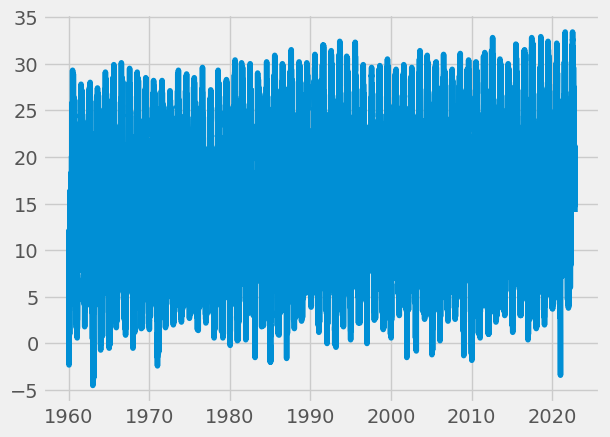

In [14]:
plt.plot(w['DATE'], w['MADRID_temp_mean']) # Select different weather station variables #no missing values

In [15]:
# Select all dates from 2005-2010
sd = w[(w['DATE'] >= '2020-01-01') & (w['DATE'] <= '2022-10-31')] # Adjust to different time periods

# Display the selected dates
sd

DATE  BASEL_cloud_cover  BASEL_global_radiation  BASEL_humidity  \
21915 2020-01-01                  0                    0.64            0.87   
21916 2020-01-02                  0                    0.65            0.87   
21917 2020-01-03                  7                    0.41            0.81   
21918 2020-01-04                  6                    0.29            0.79   
21919 2020-01-05                  0                    0.67            0.85   
...          ...                ...                     ...             ...   
22945 2022-10-27                  1                    1.34            0.79   
22946 2022-10-28                  6                    1.34            0.77   
22947 2022-10-29                  4                    1.34            0.76   
22948 2022-10-30                  5                    1.34            0.80   
22949 2022-10-31                  5                    1.34            0.84   

       BASEL_precipitation  BASEL_pressure  BASEL_sunshine  BASEL_temp_max  \
21915                 0.00          1.0339             6.5             3.2   
21916                 0.00          1.0316             6.5             3.0   
21917                 0.01          1.0287             1.6            10.1   
21918                 0.14          1.0341             0.9             8.8   
21919                 0.00          1.0367             6.6             6.1   
...                    ...             ...             ...             ...   
22945                 0.22          1.0248             7.7            21.4   
22946                 0.22          1.0244             5.4            21.9   
22947                 0.22          1.0227             6.1            22.4   
22948                 0.22          1.0212             5.8            21.1   
22949                 0.22          1.0193             3.2            19.2   

       BASEL_temp_mean  BASEL_temp_min  BELGRADE_cloud_cover  \
21915             -0.4            -3.4                     2   
21916              0.1            -2.0                     0   
21917              5.3             0.8                     0   
21918              6.0             2.3                     8   
21919              1.7            -1.5                     5   
...                ...             ...                   ...   
22945             15.9            11.4                     2   
22946             16.7            14.3                     0   
22947             16.7            13.1                     2   
22948             15.4            11.6                     1   
22949             13.5             9.9                     4   

       BELGRADE_global_radiation  BELGRADE_humidity  BELGRADE_precipitation  \
21915                       0.36               0.68                    0.00   
21916                       0.59               0.68                    0.00   
21917                       0.74               0.68                    0.00   
21918                       0.77               0.68                    0.10   
21919                       0.21               0.68                    0.00   
...                          ...                ...                     ...   
22945                       1.57               0.68                    0.18   
22946                       1.57               0.68                    0.18   
22947                       1.57               0.68                    0.18   
22948                       1.57               0.68                    0.18   
22949                       1.57               0.68                    0.18   

       BELGRADE_pressure  BELGRADE_sunshine  BELGRADE_temp_max  \
21915             1.0333                0.9                5.4   
21916             1.0347                3.4                6.1   
21917             1.0295                5.5                4.5   
21918             1.0251                5.9                2.2   
21919             1.0252                0.0                4.9   
...         

In [16]:
d = sd[['DATE', 'BASEL_temp_mean']] # Select different weather station variables
       
d.dropna(inplace=True)
d.columns = ['ds', 'y']
d.head()

ds    y
21915 2020-01-01 -0.4
21916 2020-01-02  0.1
21917 2020-01-03  5.3
21918 2020-01-04  6.0
21919 2020-01-05  1.7

In [17]:
# Create a NeuralProphet model with default parameters
m = NeuralProphet()
# Use static plotly in notebooks
m.set_plotting_backend("plotly-static")

# Fit the model
m.fit(d, freq='D', epochs=10)

Finding best initial lr:   0%|          | 0/226 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

MAE       RMSE      Loss  RegLoss  epoch
0  18.901293  23.862970  0.386154      0.0      0
1   8.164339  10.363565  0.126652      0.0      1
2   3.107623   3.881662  0.021619      0.0      2
3   2.915367   3.614220  0.019170      0.0      3
4   2.745512   3.459309  0.017476      0.0      4
5   2.678486   3.315166  0.016006      0.0      5
6   2.605952   3.236582  0.015268      0.0      6
7   2.583775   3.189155  0.014958      0.0      7
8   2.563648   3.186826  0.014898      0.0      8
9   2.554282   3.184861  0.014790      0.0      9

In [18]:
# Forecast future values for all target variables
future = m.make_future_dataframe(d, n_historic_predictions=True, periods=365)  # Adjust periods
forecast = m.predict(future)
forecast.head()

# Save the model (optional)
#m.save("neuralprophet_multivariable_model.pkl")

Predicting: 33it [00:00, ?it/s]

ds    y     yhat1      trend  season_yearly  season_weekly
0 2020-01-01 -0.4  2.714335  10.105377      -7.547203       0.156160
1 2020-01-02  0.1  2.912831  10.125164      -7.560727       0.348394
2 2020-01-03  5.3  2.645805  10.144951      -7.576098       0.076953
3 2020-01-04  6.0  2.348076  10.164736      -7.592980      -0.223679
4 2020-01-05  1.7  2.425689  10.184521      -7.610952      -0.147879

In [ ]:
# Visualize the forecast
m.plot(forecast)

In [ ]:
# Train NeuralProphet model
#m = NeuralProphet(daily_seasonality=True, yearly_seasonality=True, weekly_seasonality=False)